In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import torch

In [3]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice

In [5]:
from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)

import neural_lib as nl

In [6]:
PATH = 'C:\\Users\\Ayub\\Downloads\\datasets\\heart.csv'
df = pd.read_csv(PATH)

In [7]:
df = df.drop_duplicates()

In [8]:
df.index = df.index.astype('str')

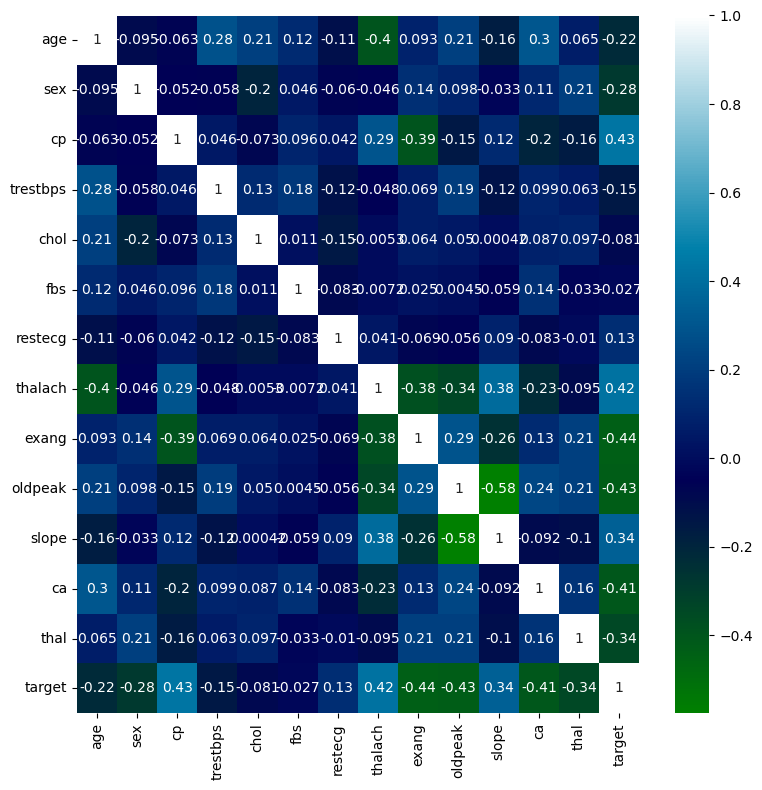

In [9]:
df_corr = df.corr()
fig = plt.figure(figsize=(8, 8))
sns.heatmap(df_corr, annot=True, cmap='ocean')
plt.tight_layout()
plt.show()
fig.savefig("corrmap")

In [10]:
y = df['target']
X = df.drop(['target'], axis=1)

Some plots

In [24]:
from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score, recall_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer

import xgboost as xgb

In [12]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", enable_categorical=True, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [15]:
cm = confusion_matrix(y_test,y_pred)

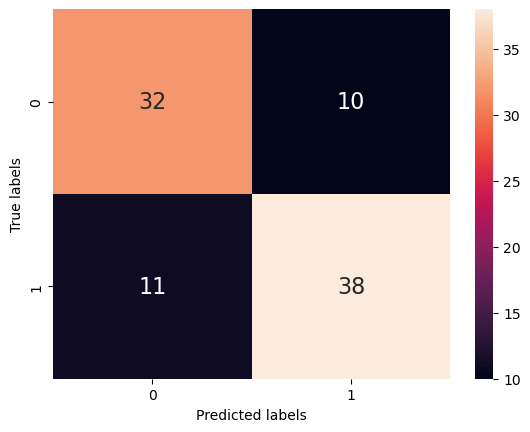

In [16]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', ax=ax); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
plt.savefig("confmatrix")

In [17]:
print(confusion_matrix(y_test, y_pred))
print('f1_score is ', f1_score(y_test, y_pred))
print('recall_score is', recall_score(y_test, y_pred))
print('roc_auc_score is ', roc_auc_score(y_test, y_pred))

[[32 10]
 [11 38]]
f1_score is  0.7835051546391752
recall_score is 0.7755102040816326
roc_auc_score is  0.7687074829931972


In [18]:
categ = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']

In [19]:
X_train_categ = X_train[categ]
X_test_categ = X_test[categ]

X_train_categ['sex'] = X_train_categ['sex'].replace({0:'female' ,1:'male'})
X_test_categ['sex'] = X_test_categ['sex'].replace({0:'female' ,1:'male'})
X_train_categ['fbs'] = X_train_categ['fbs'].replace({0:False , 1:True})
X_test_categ['fbs'] = X_test_categ['fbs'].replace({0:False , 1:True})
X_train_categ['restecg'] = X_train_categ['restecg'].replace({0:False ,1:True})
X_test_categ['restecg'] = X_test_categ['restecg'].replace({0:False ,1:True})
X_train_categ['exang'] = X_train_categ['exang'].replace({0:False ,1:True})
X_test_categ['exang'] = X_test_categ['exang'].replace({0:False ,1:True})
X_train_categ['thal'] = X_train_categ['thal'].replace({0:"normal", 1:"normal" ,2:"fixed defect", 3:"rev. defect"})
X_test_categ['thal'] = X_test_categ['thal'].replace({0:"normal", 1:"normal" ,2:"fixed defect", 3:"rev. defect"})


In [20]:
X_train_categ

,sex,cp,fbs,restecg,exang,thal
189,male,2,False,True,True,rev. defect
167,female,0,False,True,True,fixed defect
343,male,2,True,True,False,rev. defect
240,female,1,True,False,True,fixed defect
110,male,0,False,False,False,fixed defect
...,...,...,...,...,...,...
124,male,0,False,True,True,rev. defect
287,female,1,False,True,False,fixed defect
151,male,1,False,False,False,rev. defect
323,male,1,False,True,True,normal


In [25]:
onehotencoder = OneHotEncoder()
res = onehotencoder.fit_transform(X_train_categ[['sex']])
X_train_categ[onehotencoder.categories_[0]] = res.toarray()
res = onehotencoder.transform(X_test_categ[['sex']])
X_test_categ[onehotencoder.categories_[0]] = res.toarray()

res = onehotencoder.fit_transform(X_train_categ[['cp']])
cp_categs = ['cp ' + str(cat) for cat in onehotencoder.categories_[0]]
X_train_categ[cp_categs] = res.toarray()
res = onehotencoder.transform(X_test_categ[['cp']])
X_test_categ[cp_categs] = res.toarray()

res = onehotencoder.fit_transform(X_train_categ[['thal']])
thal_categs = ['thal ' + str(cat) for cat in onehotencoder.categories_[0]]
X_train_categ[thal_categs] = res.toarray()
res = onehotencoder.transform(X_test_categ[['thal']])
X_test_categ[thal_categs] = res.toarray()

X_train_categ.drop(['cp', 'sex', 'thal'],axis=1, inplace=True)
X_test_categ.drop(['cp', 'sex', 'thal'],axis=1, inplace=True)

In [26]:
for col in X_train_categ.columns:
    X_train_categ[col] = X_train_categ[col].apply(lambda x : False if (x==0 or x == '0') else True)
    X_test_categ[col] = X_test_categ[col].apply(lambda x : False if (x==0 or x == '0') else True)

In [27]:
K_train = FormalContext.from_pandas(X_train_categ)
K_train

FormalContext (211 objects, 12 attributes, 842 connections)
   |fbs|restecg|exang|female|male|...|cp 2|cp 3|thal fixed defect|thal normal|thal rev. defect|
189|   |      X|    X|      |   X|...|   X|    |                 |           |               X|
167|   |      X|    X|     X|    |...|    |    |                X|           |                |
343|  X|      X|     |      |   X|...|   X|    |                 |           |               X|
240|  X|       |    X|     X|    |...|    |    |                X|           |                |
110|   |       |     |      |   X|...|    |    |                X|           |                |
652|   |      X|     |     X|    |...|    |   X|                X|           |                |
313|   |       |    X|     X|    |...|    |    |                X|           |                |
438|   |      X|     |      |   X|...|   X|    |                X|           |                |
629|  X|       |     |      |   X|...|    |   X|                X|          

In [28]:
L = ConceptLattice.from_context(K_train, is_monotone=True, algo='Sofia')

In [29]:
from sklearn.metrics import f1_score

for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)

In [30]:
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:4])

len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects


False

In [31]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

vis = LineVizNx(node_label_font_size=6, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')

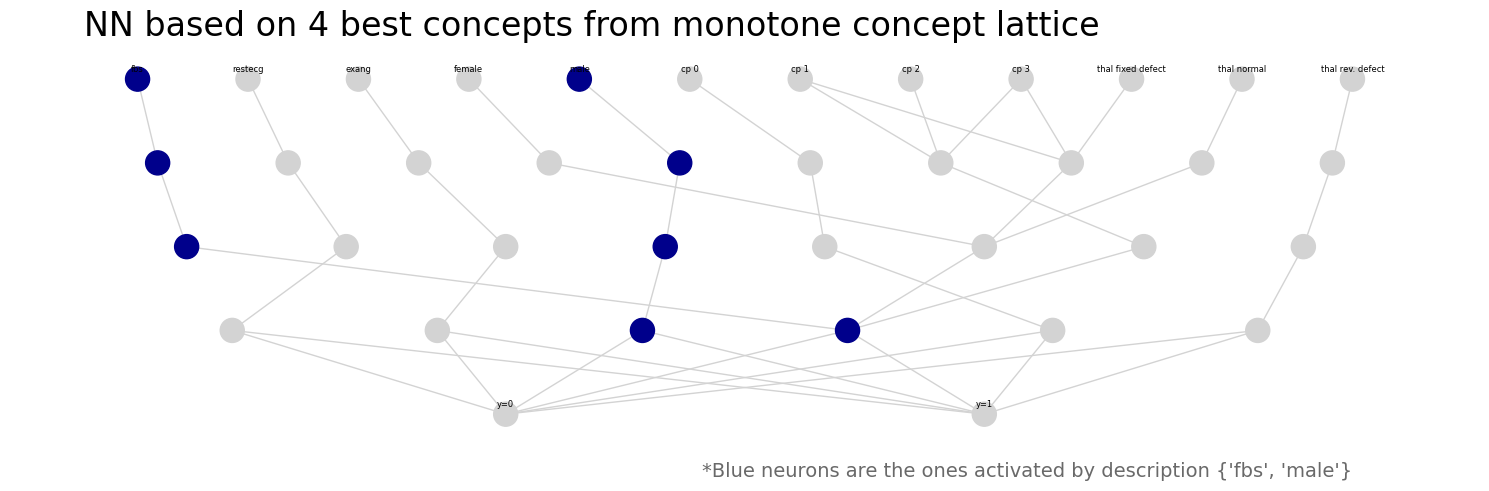

In [32]:
descr = { 'fbs', 'male'}

traced = cn.trace_description(descr, include_targets=False)

fig, ax = plt.subplots(figsize=(15,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))]
)
plt.title(f'NN based on 4 best concepts from monotone concept lattice', loc='left', x=0.05, size=24)

plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3, f'*Blue neurons are the ones activated by description {descr}', fontsize=14, ha='right', color='dimgray')

plt.subplots_adjust()
plt.tight_layout()
plt.show()
fig.savefig('base_1_lattice')


In [33]:
cn.fit(X_train_categ, y_train)

In [34]:
#print('Class prediction', cn.predict(X_test_categ).numpy())
#print('Class prediction with probabilities', cn.predict_proba(X_test_categ).detach().numpy())
#print('True class', y_test.values)

In [35]:
y_preds = cn.predict(X_test_categ).numpy()

In [36]:
confusion_matrix(y_test,y_preds)

array([[39,  3],
       [36, 13]], dtype=int64)

In [37]:
print(f1_score(y_preds, y_test))
print(recall_score(y_preds, y_test))
print(roc_auc_score(y_preds, y_test))

0.39999999999999997
0.8125
0.66625


In [38]:
edge_weights = cn.edge_weights_from_network()

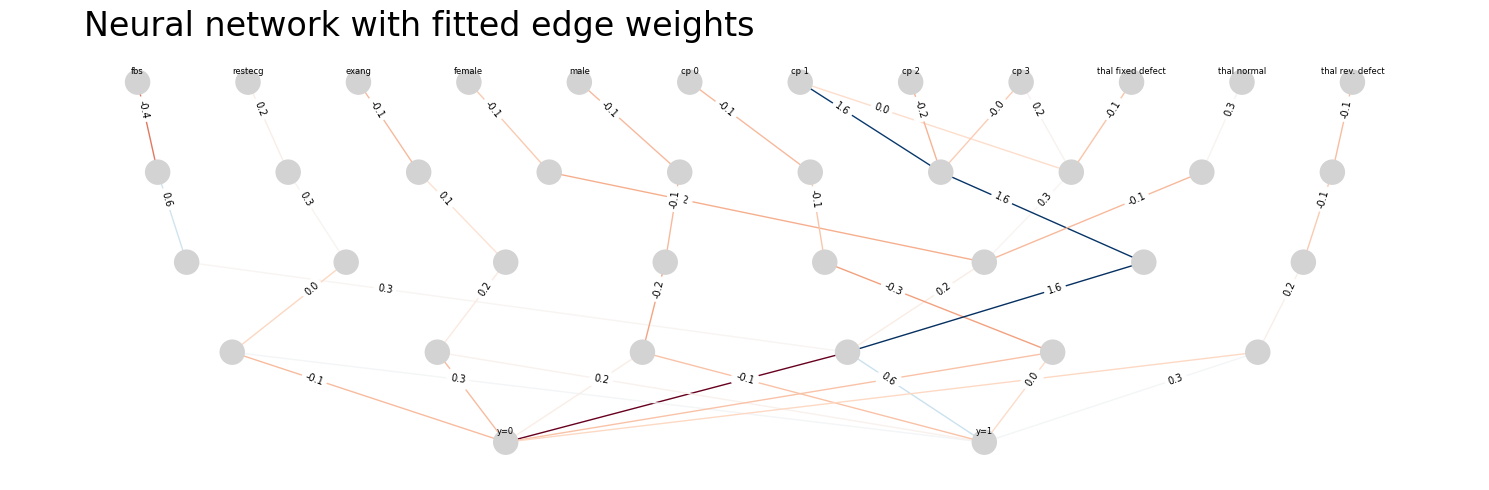

In [39]:
import networkx as nx

fig, ax = plt.subplots(figsize=(15,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7, font_size=7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_network.png')
plt.show()
fig.savefig('base_1_fitted')

In [40]:
def scale_num(df_train, df_test, n_bins, strategy):
    X_train = df_train.copy()
    X_test = df_test.copy()
    
    num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    
    for col in num_cols:
        discret = KBinsDiscretizer(strategy = strategy, n_bins=n_bins, encode = "onehot-dense")
        data_train = discret.fit_transform(X_train[[col]])
        data_test = discret.transform(X_test[[col]])
        edges = discret.bin_edges_[0]
        categ_names = [col+f'|{edges[i]}:{edges[i+1]}|' for i in range(len(edges)-1)]
        X_train[categ_names] = data_train
        X_test[categ_names] = data_test
        
        X_train.drop([col], axis=1, inplace=True)
        X_test.drop([col], axis=1, inplace=True)
    
    cols = X_train.columns
    for col in cols:
        X_train[col] = X_train[col].apply(lambda x : False if (x==0 or x == '0') else True)
        X_test[col] = X_test[col].apply(lambda x : False if (x==0 or x == '0') else True)

    return X_train, X_test

In [41]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

In [42]:
data = {}
for n_bins in [2,3]:
    for strat in ['quantile', 'uniform']:
        data[(n_bins, strat)] = {}
        data[(n_bins, strat)]['train'] = pd.concat([scale_num(X_train_num, X_test_num, n_bins,strat)[0], X_train_categ], axis=1)
        data[(n_bins, strat)]['test'] = pd.concat([scale_num(X_train_num, X_test_num, n_bins,strat)[1], X_test_categ], axis=1)

        

In [43]:
scale_num(X_train, X_test, 2,'uniform')[0]

,age|29.0:53.0|,age|53.0:77.0|,sex|0.0:0.5|,sex|0.5:1.0|,cp|0.0:1.5|,cp|1.5:3.0|,trestbps|94.0:147.0|,trestbps|147.0:200.0|,chol|126.0:345.0|,chol|345.0:564.0|,...,exang|0.0:0.5|,exang|0.5:1.0|,oldpeak|0.0:3.1|,oldpeak|3.1:6.2|,slope|0.0:1.0|,slope|1.0:2.0|,ca|0.0:2.0|,ca|2.0:4.0|,thal|0.0:1.5|,thal|1.5:3.0|
189,False,True,False,True,False,True,True,False,True,False,...,False,True,True,False,False,True,True,False,False,True
167,False,True,True,False,True,False,True,False,False,True,...,False,True,True,False,False,True,True,False,False,True
343,True,False,False,True,False,True,False,True,True,False,...,True,False,True,False,False,True,True,False,False,True
240,False,True,True,False,True,False,True,False,True,False,...,False,True,True,False,False,True,True,False,False,True
110,True,False,False,True,True,False,True,False,True,False,...,True,False,True,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,False,True,False,True,True,False,True,False,True,False,...,False,True,False,True,False,True,True,False,False,True
287,False,True,True,False,True,False,False,True,True,False,...,True,False,True,False,False,True,False,True,False,True
151,False,True,False,True,True,False,False,True,True,False,...,True,False,True,False,False,True,True,False,False,True
323,False,True,False,True,True,False,False,True,True,False,...,False,True,True,False,False,True,False,True,True,False


In [61]:
def ConceptNetwork(X_train, y_train, conc, score_func=f1_score, score_name='f1_score'):
    K_train = FormalContext.from_pandas(X_train)
    L = ConceptLattice.from_context(K_train, is_monotone=True, algo='Sofia')

    for c in L:
        y_preds = np.zeros(K_train.n_objects)
        y_preds[list(c.extent_i)] = 1
        c.measures[score_name] = score_func(y_train, y_preds)

    best_concepts = list(L.measures[score_name].argsort()[::-1][:conc])
    cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
    return K_train, L, cn


In [243]:
def visualizer(cn, save=False, title=True):
    fig, ax = plt.subplots(figsize=(20,8))
    
    edge_weights = cn.edge_weights_from_network()

    vis = LineVizNx(
        node_label_font_size=14, 
        node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n',
        edge_cmap="hsv"
        )

    vis.draw_poset(
        cn.poset, ax=ax, node_color='black',
        flg_node_indices=False,
        node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
        edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
        edge_cmap=plt.cm.RdBu,
    )
    nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

    if title:
        plt.title('Neural network with fitted edge weights', size=24, loc='center')
    plt.tight_layout()
    plt.subplots_adjust()
    if save:
        plt.savefig('fitted_network.png')
    plt.show()

In [158]:
K_train2, L2, cn2 = ConceptNetwork(data[(2,'uniform')]['train'], y_train, conc=7)

In [159]:
cn2.fit(data[(2,'uniform')]['train'], y_train)

In [160]:
print('Class prediction', cn2.predict(data[(2,'uniform')]['test']).numpy())

Class prediction [1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1
 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1]


In [161]:
y_preds2 = cn2.predict(data[(2,'uniform')]['test']).numpy()

In [162]:
print(f1_score(y_preds2, y_test))
print(recall_score(y_preds2, y_test))

0.7777777777777777
0.711864406779661


In [163]:
confusion_matrix(y_test, y_preds2)

array([[25, 17],
       [ 7, 42]], dtype=int64)

In [195]:
K_train3, L3, cn3 = ConceptNetwork(data[(2,'uniform')]['train'], y_train, conc=8, score_func=recall_score, score_name='recall_score')
cn3.fit(data[(2,'uniform')]['train'], y_train)

In [196]:
print('Class prediction', cn3.predict(data[(2,'uniform')]['test']).numpy())

Class prediction [1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1
 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1]


In [197]:
y_preds3 = cn3.predict(data[(2,'uniform')]['test']).numpy()
print(f1_score(y_preds3, y_test))
print(recall_score(y_preds3, y_test))
confusion_matrix(y_test, y_preds3)

0.7924528301886793
0.7368421052631579


array([[27, 15],
       [ 7, 42]], dtype=int64)

F1 + Non-linlinearities

In [202]:
K_train4, L4, cn4 = ConceptNetwork(data[(2,'uniform')]['train'], y_train, conc=9)
cn4.fit(data[(2,'uniform')]['train'], y_train, nonlinearity=torch.nn.LeakyReLU)

In [203]:
print('Class prediction', cn4.predict(data[(2,'uniform')]['test']).numpy())

Class prediction [1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1
 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1]


In [204]:
y_preds4 = cn4.predict(data[(2,'uniform')]['test']).numpy()
print(f1_score(y_preds4, y_test))
print(recall_score(y_preds4, y_test))
confusion_matrix(y_test, y_preds4)

0.7924528301886793
0.7368421052631579


array([[27, 15],
       [ 7, 42]], dtype=int64)

In [211]:
K_train5, L5, cn5 = ConceptNetwork(data[(2,'uniform')]['train'], y_train, conc=10)
cn5.fit(data[(2,'uniform')]['train'], y_train,nonlinearity=torch.nn.Tanh)

In [212]:
print('Class prediction', cn5.predict(data[(2,'uniform')]['test']).numpy())

Class prediction [1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1
 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1]


In [213]:
y_preds5 = cn5.predict(data[(2,'uniform')]['test']).numpy()
print(f1_score(y_preds5, y_test))
print(recall_score(y_preds5, y_test))
confusion_matrix(y_test, y_preds5)

0.803921568627451
0.7735849056603774


array([[30, 12],
       [ 8, 41]], dtype=int64)

Recall + non-linearities

In [222]:
K_train6, L6, cn6 = ConceptNetwork(data[(2,'uniform')]['train'], y_train, conc=10, score_func=recall_score, score_name='recall_score')
cn6.fit(data[(2,'uniform')]['train'], y_train,nonlinearity=torch.nn.LeakyReLU)

In [223]:
print('Class prediction', cn6.predict(data[(2,'uniform')]['test']).numpy())

Class prediction [1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1
 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1
 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1]


In [224]:
y_preds6 = cn6.predict(data[(2,'uniform')]['test']).numpy()
print(f1_score(y_preds6, y_test))
print(recall_score(y_preds6, y_test))
confusion_matrix(y_test, y_preds6)

0.7799999999999999
0.7647058823529411


array([[30, 12],
       [10, 39]], dtype=int64)

In [236]:
K_train7, L7, cn7 = ConceptNetwork(data[(2,'uniform')]['train'], y_train, conc=9, score_func=recall_score, score_name='recall_score')
cn7.fit(data[(2,'uniform')]['train'], y_train, nonlinearity=torch.nn.Tanh)

In [237]:
print('Class prediction', cn7.predict(data[(2,'uniform')]['test']).numpy())

Class prediction [1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1
 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1]


In [238]:
y_preds7 = cn7.predict(data[(2,'uniform')]['test']).numpy()
print(f1_score(y_preds7, y_test))
print(recall_score(y_preds7, y_test))
confusion_matrix(y_test, y_preds7)

0.803921568627451
0.7735849056603774


array([[29, 13],
       [ 8, 41]], dtype=int64)

Other scaling : 3 bins, 'quantile'

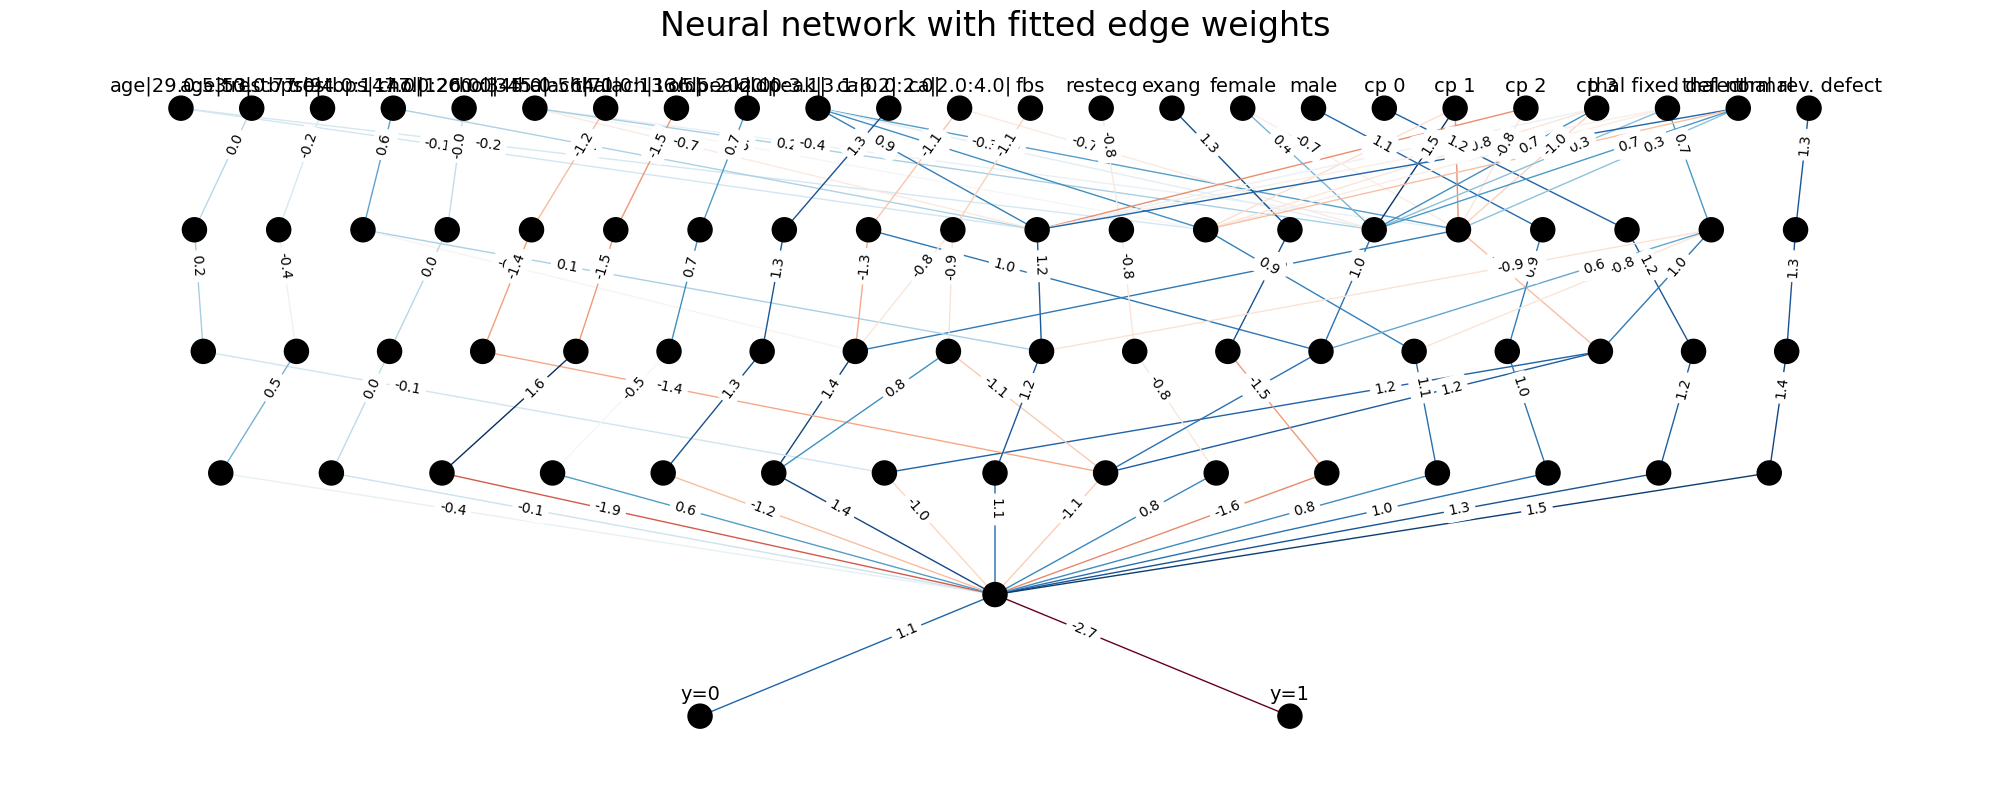

In [245]:
visualizer(cn7,save=True)

In [265]:
K_train8, L8, cn8 = ConceptNetwork(data[(3,'quantile')]['train'], y_train, conc=9, score_func=recall_score, score_name='recall_score')
cn8.fit(data[(3,'quantile')]['train'], y_train, nonlinearity=torch.nn.LeakyReLU)

In [266]:
print('Class prediction', cn8.predict(data[(3,'quantile')]['test']).numpy())

Class prediction [1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1
 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1]


In [267]:
y_preds8 = cn8.predict(data[(3,'quantile')]['test']).numpy()
print(f1_score(y_preds8, y_test))
print(recall_score(y_preds8, y_test))
confusion_matrix(y_test, y_preds8)

0.7884615384615385
0.7454545454545455


array([[28, 14],
       [ 8, 41]], dtype=int64)

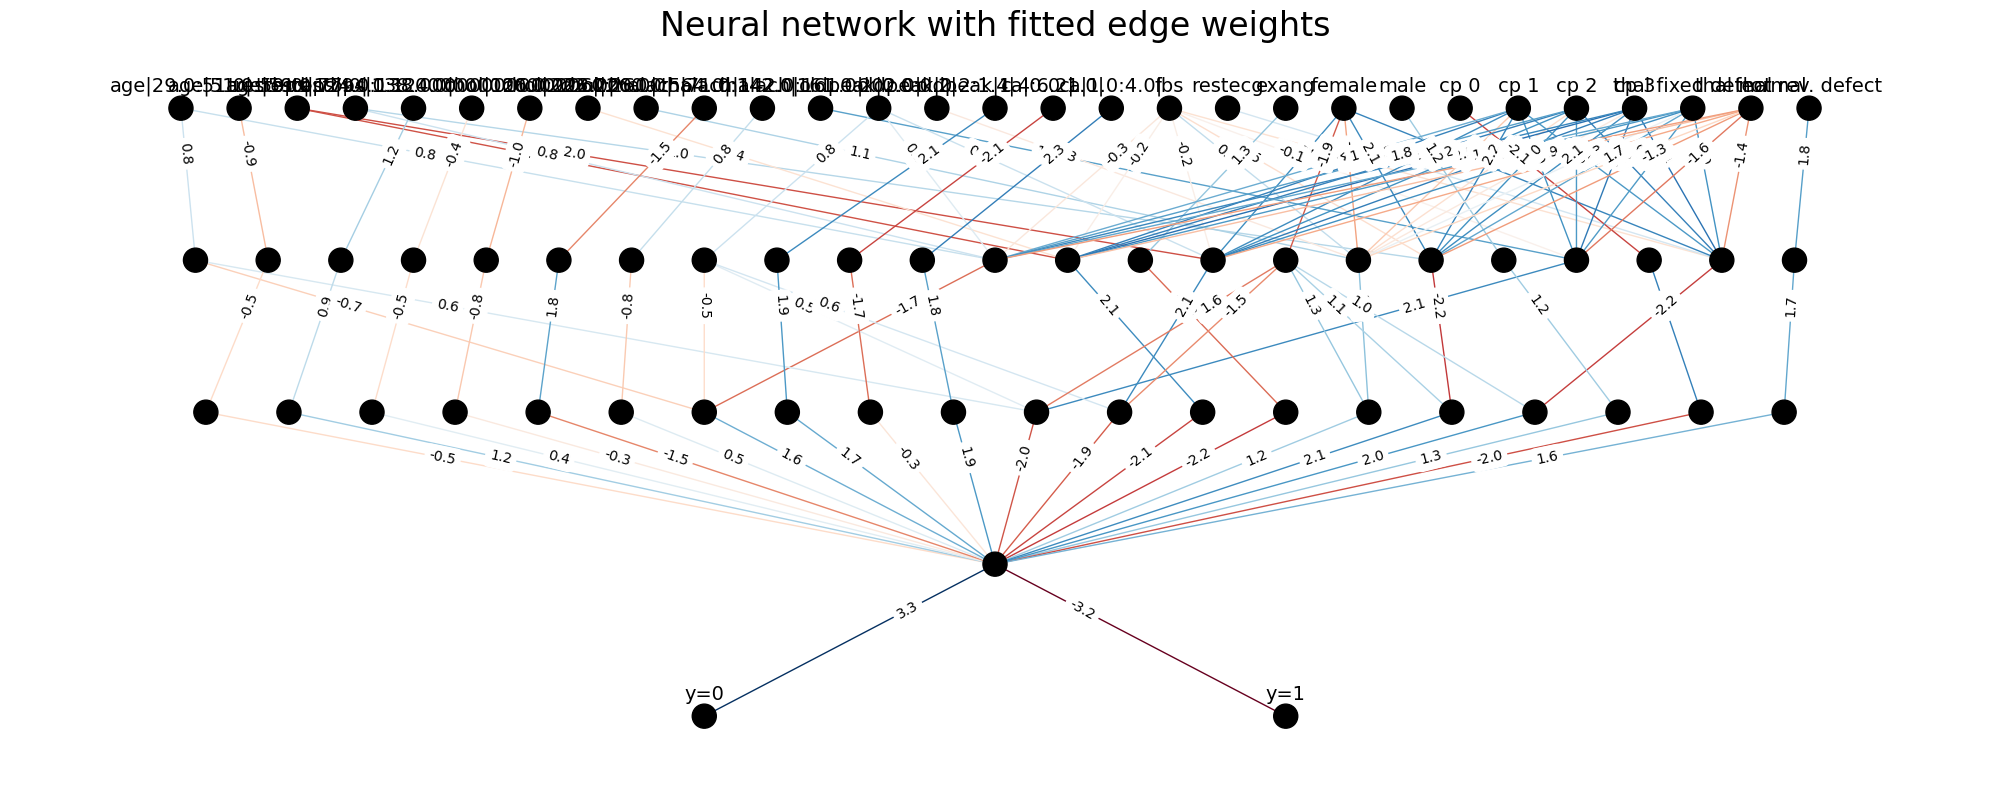

In [268]:
visualizer(cn8, save=True)